# Exploring the data

**Author:** Jérémie Dentan

This notebook aims at being run under Python 3.9, with dependencies in `requirements.txt` installed, and PYTHONPATH set to the root of the repository.

In [2]:
from pathlib import Path
import os
import sys

while not Path('requirements.txt').exists():
    os.chdir('..')

if str(Path(os.getcwd())) not in sys.path:
    sys.path.append(str(Path(os.getcwd())))

print(f'Root of the project: {Path(os.getcwd())}')

Root of the project: /Users/jeremie/Documents/02-Scolarité/01-MVA/03-Cours_S2/01-KernelMethods/kernel-proteins


In [3]:
import collections

import matplotlib.pyplot as plt
import numpy as np

from src.utils.graphs import graph_manager

## Iterating over the graphs

In [4]:
# Train
histo_label_train = collections.defaultdict(int)
histo_edge_train = collections.defaultdict(int)
histo_node_train = collections.defaultdict(int)
for gph, lab, _, _ in graph_manager.train:
    # Label
    histo_label_train[lab] += 1
    # Edge histo
    for index in gph.edges:
        histo_edge_train[gph.edges[index]['labels'][0]] += 1
    # Node histo
    for index in gph.nodes:
        histo_node_train[gph.nodes[index]['labels'][0]] += 1

# Test
histo_label_test = collections.defaultdict(int)
histo_edge_test = collections.defaultdict(int)
histo_node_test = collections.defaultdict(int)
for gph, lab, _, _ in graph_manager.test:
    # Label
    histo_label_test[lab] += 1
    # Edge histo
    for index in gph.edges:
        histo_edge_test[gph.edges[index]['labels'][0]] += 1
    # Node histo
    for index in gph.nodes:
        histo_node_test[gph.nodes[index]['labels'][0]] += 1

      213867ms INFO  [graphs.py] Loading train data from /data/training_data.pkl
      214407ms INFO  [graphs.py] Loading labels data from /data/training_labels.pkl
      214571ms INFO  [graphs.py] Loading test data from /data/test_data.pkl


## Edge and labels histograms

     5103276ms WARNING [legend.py] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


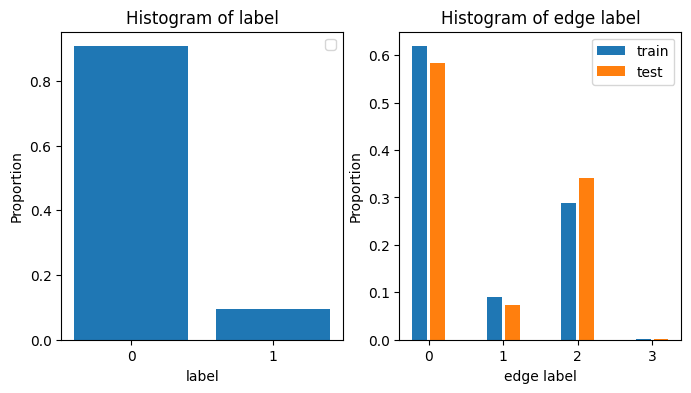

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax_1, ax_2 = axes.flatten()

# FIRST PLOT
# Setting
dict_train = histo_label_train
title = 'label'

# Extract category names and counts from both dictionaries
categories = sorted(list(dict_train.keys()))
count_train = sum(dict_train.values())
prop_train = [dict_train[key]/count_train for key in categories]

x_axis = np.arange(len(categories))
ax_1.bar(
    x_axis,
    prop_train,
)

ax_1.set_xticks(x_axis, [str(item)[:6] for item in categories])
ax_1.set_xlabel(f"{title}")
ax_1.set_ylabel(f"Proportion")
ax_1.set_title(f"Histogram of {title}")
ax_1.legend()

# SECOND PLOT
# Setting
dict_train = histo_edge_train
dict_test= histo_edge_test
title = 'edge label'

# Extract category names and counts from both dictionaries
categories = sorted(list(dict_train.keys()))
count_train = sum(dict_train.values())
count_test = sum(dict_test.values())
prop_train = [dict_train[key]/count_train for key in categories]
prop_test = [dict_test[key]/count_test for key in categories]

x_axis = np.arange(len(categories))
ax_2.bar(
    x_axis - 0.12,
    prop_train,
    width = 0.20,
    label='train'
)
ax_2.bar(
    x_axis + 0.12,
    prop_test,
    width = 0.20,
    label='test'
)

ax_2.set_xticks(x_axis, [str(item)[:6] for item in categories])
ax_2.set_xlabel(f"{title}")
ax_2.set_ylabel(f"Proportion")
ax_2.set_title(f"Histogram of {title}")
ax_2.legend()

plt.show()

## Node histograms

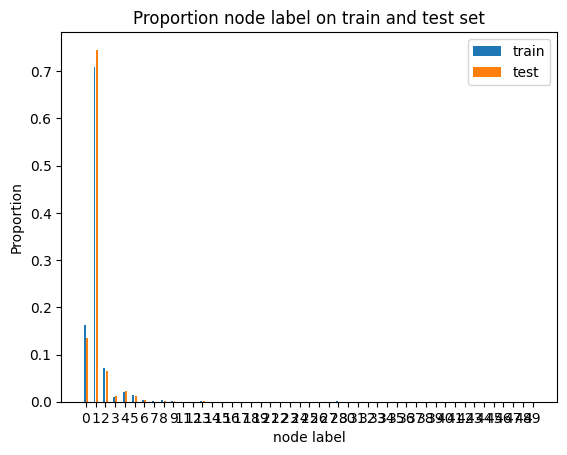

In [16]:
# Setting
dict_train = histo_node_train
dict_test= histo_node_test
title = 'node label'

# Extract category names and counts from both dictionaries
categories = sorted(list(dict_train.keys()))
count_train = sum(dict_train.values())
count_test = sum(dict_test.values())
prop_train = [dict_train[key]/count_train for key in categories]
prop_test = [dict_test[key]/count_test for key in categories]

x_axis = np.arange(len(categories))
plt.bar(
    x_axis - 0.12,
    prop_train,
    width = 0.20,
    label='train'
)
plt.bar(
    x_axis + 0.12,
    prop_test,
    width = 0.20,
    label='test'
)

plt.xticks(x_axis, [str(item)[:6] for item in categories])
plt.xlabel(f"{title}")
plt.ylabel(f"Proportion")
plt.title(f"Proportion {title} on train and test set")
plt.legend()
plt.show()